<a href="https://colab.research.google.com/github/Uzmamushtaque/ML-with-Tensorflow/blob/main/Linear_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Implementation using Tensorflow

In [11]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt


In [7]:
def synthetic_data(w, b, num_examples): 
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [8]:
print('features:', features[0], '\nlabel:', labels[0])

features: tf.Tensor([-1.3660494  1.5426173], shape=(2,), dtype=float32) 
label: tf.Tensor([-3.7908213], shape=(1,), dtype=float32)


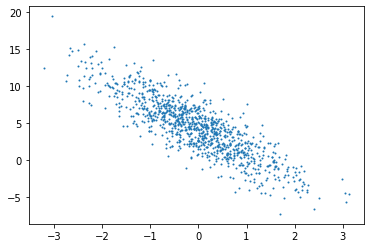

In [12]:
#tf.set_figsize()
# The semicolon is for displaying the plot only
plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1)

Create a function to form mini-batches of data (multiple passes).

In [13]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [14]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[ 1.7122906   0.29417062]
 [-0.4545418   0.21807891]
 [ 0.12247421  0.91440004]
 [-0.36101276  0.07182568]
 [-2.2627032  -1.4746025 ]
 [-0.10242056  0.54203844]
 [ 0.41216797 -1.5460815 ]
 [ 0.4987404   2.0102758 ]
 [-0.02765741  0.32291406]
 [ 1.6963754  -1.2815439 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 6.620049 ]
 [ 2.5422077]
 [ 1.3491087]
 [ 3.2208586]
 [ 4.690246 ]
 [ 2.142361 ]
 [10.290553 ]
 [-1.6277652]
 [ 3.0490074]
 [11.96849  ]], shape=(10, 1), dtype=float32)


Initializing model parameters

In [15]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

Defining the Model

In [16]:
def linreg(X, w, b): 
    """The linear regression model."""
    return tf.matmul(X, w) + b

Defining the Loss function

In [18]:
def squared_loss(y_hat, y): 
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape))**2 / 2

The Optimization Algorithm

In [19]:
def sgd(params, grads, lr, batch_size): 
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr * grad / batch_size)

Training the Model

In [20]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.026590
epoch 2, loss 0.000091
epoch 3, loss 0.000050


In [21]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [0.00023234 0.00036311]
error in estimating b: [-4.339218e-05]
